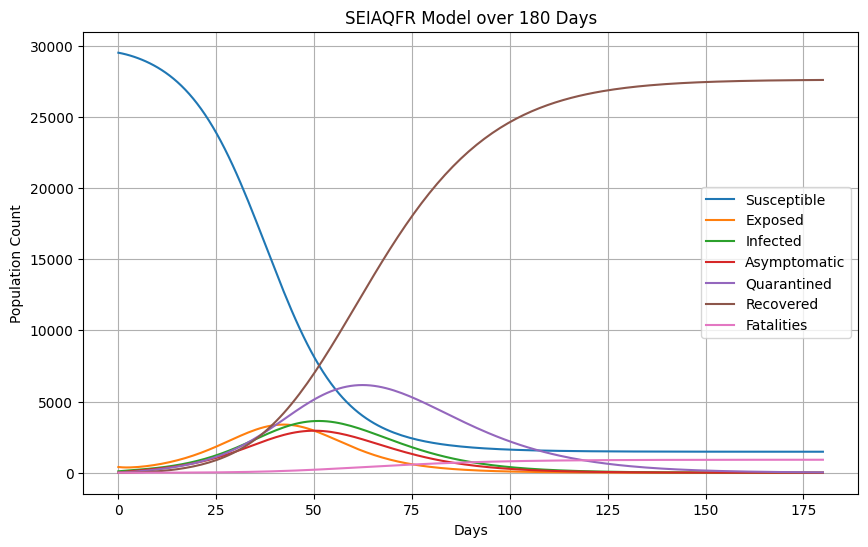

In [2]:
### Predictive Model of Epidemic using SEIAQFR Model ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SEIAQFR system of ODEs
def SEIAQFR(classes, t, *params):
    S, E, I, A, Q, R, F = classes # as a function of time
    N, beta, alpha, p, gamma, phi, q, theta, delta, x = params

    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - alpha * E
    dIdt = alpha * p * E + phi * (1-q) * A - gamma * I
    dAdt = alpha * (1-p) * E - phi * A
    dQdt = gamma * I - theta * (1-x) * Q - delta * x * Q
    dRdt = phi * q * A + theta * (1-x) * Q
    dFdt = delta * x * Q
    
    return [dSdt, dEdt, dIdt, dAdt, dQdt, dRdt, dFdt]


# Parameters
# placeholder parameters
N = 30000  # total population
beta = 0.5  # average contact frequency
alpha = 1/5  # inverse of incubation period
p = 0.5  # fraction that becomes symptomatic
gamma = 1/7  # rate of quarantine
phi = 1/10  # rate of symptom development in asymptomatics
q = 0.2  # fraction of asymptomatics that automatically recover
theta = 1/14  # recovery rate after treatment
delta = 1/20  # fatality rate
x = 0.05  # probability of death

params = [N, beta, alpha, p, gamma, phi, q, theta, delta, x] # this is a tuple (cant modify these values)

# Initial conditions
I0 = 100  # initial infected
E0 = 4 * I0  # 4 times as many exposed as symptomatic initially (for illustration)
S0 = N - I0 - E0  # initial susceptible
A0 = 0
Q0 = 0
R0 = 0  # initial recovered
F0 = 0  # initial fatalities

initial_conditions = [S0, E0, I0, A0, Q0, R0, F0]

# Time vector
timespan_days = 180
t = np.linspace(0, timespan_days, timespan_days)

# Solve the ODE
sol = odeint(SEIAQFR, initial_conditions, t, args=tuple(params))

# Plotting classes of population together
plt.figure(figsize=(10,6))
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Exposed')
plt.plot(t, sol[:, 2], label='Infected')
plt.plot(t, sol[:, 3], label='Asymptomatic')
plt.plot(t, sol[:, 4], label='Quarantined')
plt.plot(t, sol[:, 5], label='Recovered')
plt.plot(t, sol[:, 6], label='Fatalities')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Population Count')
plt.title('SEIAQFR Model over ' + str(timespan_days) + ' Days')
plt.grid(True)
plt.show()

# Plotting classes of population individually... (this is unnecessary for now)

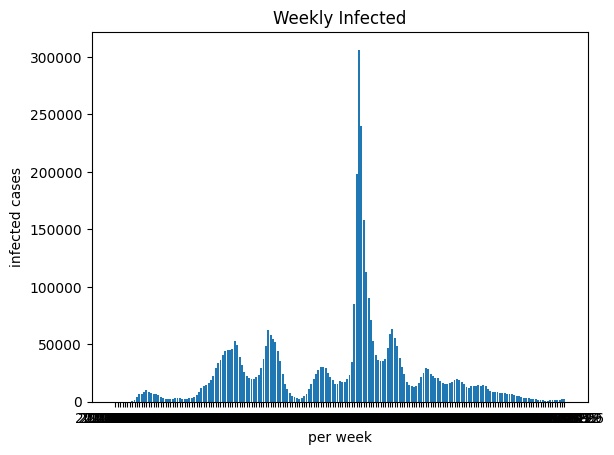

In [5]:
### Start of Data Scrubbing ###
### GRAPHING REAL WORLD DATA AND ANALYZING FOR PARAMETERS FOR BETTER MATHEMATICAL MODEL ###

import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = pd.read_csv('weekly_cases_canada.csv')

recorded_week = data['date'].values
observed_infected = data['cases'].values
observed_fatalities = data['deaths'].values
# observed_recovered = data['recovered'].values

# graph of weekly infected individuals
infected_graph_weekly = plt.bar(recorded_week, observed_infected)
infected_graph_weekly = plt.title('Weekly Infected')
infected_graph_weekly = plt.xlabel('per week')
infected_graph_weekly = plt.ylabel('infected cases')

#graph of weeky deaths
# deaths_graph_weekly = plt.bar(recorded_week, observed_fatalities)
# deaths_graph_weekly = plt.title('Weekly Deaths')
# deaths_graph_weekly = plt.xlabel("week")
# deaths_graph_weekly = plt.ylabel('fatal cases')





# timespan_days = len(observed_infected)
# t = np.linspace(0, timespan_days, timespan_days)

# # Plotting the data
# plt.figure(figsize=(12, 6))

# # Plot the infected data
# plt.plot(recorded_week, observed_infected, label='Infected', color='blue', marker='o')

# # Plot the fatalities data
# plt.plot(recorded_week, observed_fatalities, label='Fatalities', color='red', marker='o')

# # Uncomment below if you have 'recovered' data in the future
# # plt.plot(recorded_week, observed_recovered, label='Recovered', color='green', marker='o')

# plt.xlabel('Weeks')
# plt.ylabel('Number of Cases')
# plt.title('Weekly Covid-19 Data for Canada')
# plt.xticks(rotation=45)  # Rotating the week labels for better visibility
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()

# # Objective function to minimize
# def objective(params):
#     # Using a subset of parameters for simplicity
#     beta, gamma, delta, x = params
#     # Keeping other parameters fixed for this example
#     N, alpha, p, phi, q, theta = 30000, 1/5, 0.5, 1/10, 0.2, 1/14
    
#     full_params = [N, beta, alpha, p, gamma, phi, q, theta, delta, x]
#     sol = odeint(SEIAQFR, initial_conditions, t, args=tuple(full_params))
    
#     error_infected = np.sum((sol[:, 2] - observed_infected)**2)
#     error_recovered = np.sum((sol[:, 5] - observed_recovered)**2)
#     error_fatalities = np.sum((sol[:, 6] - observed_fatalities)**2)
    
#     return error_infected + error_recovered + error_fatalities

# # Initial guesses for parameters
# initial_guess = [0.5, 1/7, 1/20, 0.05]

# # Run optimization
# result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=[(0.1, 1), (1/14, 1/3), (1/30, 1/7), (0, 1)])

# # Extract estimated parameters
# beta_est, gamma_est, delta_est, x_est = result.x

# print(f"Estimated beta: {beta_est}")
# print(f"Estimated gamma: {gamma_est}")
# print(f"Estimated delta: {delta_est}")
# print(f"Estimated x: {x_est}")